# Moulik Prajapati

## Task- 1 : Prediction using supervised ML

### Linear Regression
Importing required libraries for processing the data set

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#creating data frame form the given url

df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print(df.shape)
print(df.describe())

(25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [4]:
#checking for the null values if any present in the data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

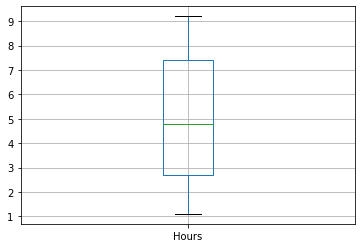

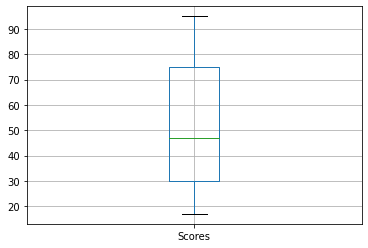

In [5]:
import matplotlib.pyplot as plt
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

This box plots shows data set *does not* contain **outliers** in the data set

<AxesSubplot:xlabel='Hours', ylabel='Density'>

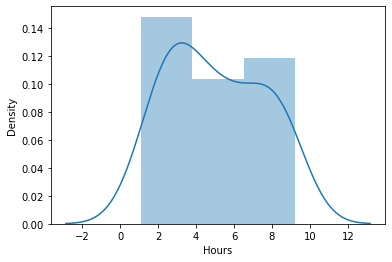

In [7]:
import seaborn as sns 
sns.distplot(df["Hours"])

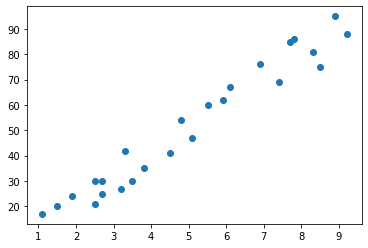

In [6]:
plt.scatter(x="Hours", y="Scores", data= df)

### Preparing the data for building the model
creating X and Y arrays

In [20]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

## Creating Training and testing data 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,
                                                   random_state=10)

# Building the model

In [22]:
from sklearn.linear_model import LinearRegression

lm= LinearRegression()

lm.fit(X_train, Y_train)

print(lm.intercept_)
print(lm.coef_)

2.6499651894038863
[9.81430544]


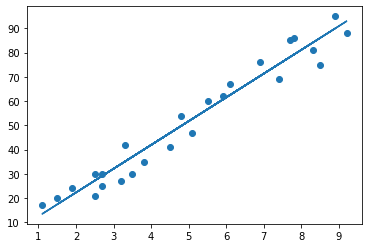

In [23]:
# plotting the regression line

line = lm.intercept_ + lm.coef_*X

plt.scatter(X,Y)
plt.plot(X, line)
plt.show()

In [24]:
print(X_test) #printing testing data in hours
Y_pred = lm.predict(X_test)

[[1.5]
 [5.1]
 [3.3]
 [3.2]
 [4.5]]


In [25]:
predicted_df = pd.DataFrame({"Actual": Y_test, "Predicted": Y_pred })
predicted_df

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


## Evaluating the model built

In [26]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

r2=r2_score(Y_test,Y_pred)
print("R Square : ",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Square error:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R square:",adjusted_r_squared)

print("Mean absolute error:", mean_absolute_error(Y_test, Y_pred))

R Square :  0.6683995499740194
Root Mean Square error: 5.856684262506168
Adjusted R square: 0.6539821391033246
Mean absolute error: 5.632881746692995


**Testing the model with given value**

In [28]:
hours = [[9.25]]
pred = lm.predict(hours)

print("No of Hours : {} ".format(hours))
print("Predicted score : {}". format(pred))

No of Hours : [[9.25]] 
Predicted score : [93.43229054]
